In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib as mpl
import numpy.ma as ma
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
def get_varbs(kind, case, fname, meshmaskname, dep_ind):
    
    dirname = '/ocean/imachuca/Canyons/results_mackenzie/extended_domain/'+kind+'_'+case+'/'
    
    filesW = general_functions.get_files(dirname, fname, 'grid_W')
    
    y,x = slice(1,-1,None), slice(1,-1,None)
    time = 6*24
    
    with scDataset(filesW) as dsW:
        vovecrtz = dsW.variables['vovecrtz'][:time, dep_ind, y, x]
        
    with nc.Dataset(os.path.join(dirname, meshmaskname), 'r') as dsM:
        e1t0 = np.nanmean(dsM.variables['e1t'][0, y, x], axis=0)
        e2t0 = np.nanmean(dsM.variables['e2t'][0, y, x], axis=1)
        e1t = np.cumsum(e1t0) / 1000 # km
        e2t = np.cumsum(e2t0) / 1000 # km
        
    return vovecrtz, e1t, e2t

In [3]:
def get_max_vovecrtz(kind, cases, fname, meshmaskname, dep_ind):
    xs = []
    max_vovecrtz = []
    for case, n in zip(cases, np.arange(len(cases))):
        if case == 'half': x = 1
        elif case == 'base': x = 2
        elif case == 'baseAW': x = 2
        elif case == 'double': x = 3
        xs.append(x)
        vovecrtz, e1t, e2t = get_varbs(kind, case, fname, meshmaskname, dep_ind)
        max_vovecrtz.append(np.nanmax(vovecrtz))
    return xs, max_vovecrtz

In [4]:
fname = '1_MCKNZ_1h_20170101_201701*'
meshmaskname = '1_mesh_mask.nc'
dep_ind = 9


kind = 'ideal'
cases = ['half', 'base', 'double']
ideal_xs, ideal_max_vovecrtz = get_max_vovecrtz(kind, cases, fname, meshmaskname, dep_ind)

kind = 'real'
cases = ['half', 'base', 'double']
real_xs, real_max_vovecrtz = get_max_vovecrtz(kind, cases, fname, meshmaskname, dep_ind)

kind = 'real'
cases = ['baseAW']
realAW_xs, realAW_max_vovecrtz = get_max_vovecrtz(kind, cases, fname, meshmaskname, dep_ind)

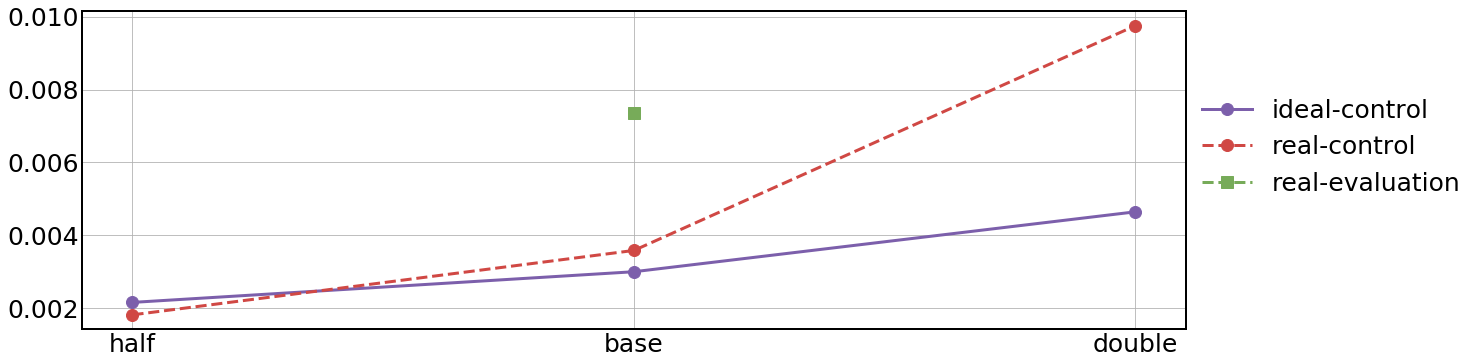

In [33]:
fs_numb, fs_str, ms = 25, 30, 12
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.15])
ax = plt.subplot(gs[0, 0])
leg = plt.subplot(gs[0, 1]); leg.axis('off')

# ------------
l1 = ax.plot(ideal_xs, ideal_max_vovecrtz, lw=3, marker='o', ms=ms, c='#7c5fab', ls='-', label='ideal-control')
l2 = ax.plot(real_xs, real_max_vovecrtz, lw=3, marker='o', ms=ms, c='#d04844', ls='--', label='real-control')
l3 = ax.plot(realAW_xs, realAW_max_vovecrtz, lw=3, marker='s', ms=ms, c='#77ab59', ls='--', label='real-evaluation')
# ------------

lns = l1 + l2 + l3
labels = [l.get_label() for l in lns]
fig.legend(lns, labels, loc='upper right', bbox_to_anchor=(1.03, 0.8), fontsize=fs_numb, ncol=1, frameon=False)
ax.set_xticks(ideal_xs)
ax.set_xticklabels(['half', 'base', 'double'])
ax.grid(which='major', axis='both', linestyle='-')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='both', which='both', length=0, labelsize=fs_numb)

fig.tight_layout()
fig.patch.set_facecolor('white')    
plt.subplots_adjust(top=0.99, wspace=0.1, hspace=0.1)
fig.savefig('./fig_comparison_maxw.png', dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())